In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  plt.show()

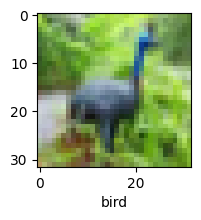

In [ ]:
plot_sample(X_train, y_train, 6)

In [ ]:
X_train = X_train / 255
y_train = y_train / 255

In [ ]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 290s 185ms/step - accuracy: 0.1040 - loss: 0.0425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 181ms/step - accuracy: 0.1001 - loss: 0.0000e+00
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 306s 171ms/step - accuracy: 0.1023 - loss: 0.0000e+00
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 323s 172ms/step - accuracy: 0.1003 - loss: 0.0000e+00
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 173ms/step - accuracy: 0.0999 - loss: 0.0000e+00
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 317s 170ms/step - accuracy: 0.1025 - loss: 0.0000e+00
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 318s 167ms/step - accuracy: 0.1008 - loss: 0.0000e+00
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 166ms/step - accuracy: 0.0990 - loss: 0.0000e+00
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 172ms/step - accuracy: 0.1018 - loss: 0.0000e+00
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 313s 166ms/step - accuracy: 0.1009 - loss: 0.0000e+00


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1001 - loss: 55626.7305


[55387.0, 0.10000000149011612]

In [ ]:
y_test = y_test.reshape(-1, )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

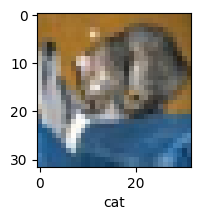

In [ ]:
plot_sample(X_test, y_test, 0)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(y_pred[4])

0

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)